TP1
======

**Objectif**: 

* statistiques descriptives de base.
* utiliser Python et pandas pour vérifier les calculs.

**Durée:** 3h

**Instructions générales:**
    
* ouvrir un navigateur et aller à l'adresse [www](https://gitlab.com/hazaa/oml5/-/blob/main/mystmd_latex/TP1.ipynb)
* pour télécharger ce fichier, cliquer sur l'icône "Télécharger" en haut à droite.
   *  en cas d'échec, cliquer sur l'icone juste à gauche de la précédente, "ouvrir la version brute". Ceci ouvre un fichier texte dans le navigateur. Faites "Enregistrer sous" avec le navigateur.
* Lancer Jupyter-notebook et ouvrir "TP1.ipynb" depuis jupyter.    
* ouvrir un terminal linux (Ctr+Al+T) et installer la librairie pandas: 
   >pip3 install pandas==2.0.3
* Si vous cherchez de l'**aide** sur une fonction Python/Numpy depuis Jupyter Notebook:
   *  ouvrez une cellule et taper par exemple `?np.sin`, puis validez.
   *  sinon cherchez dans sur la documentation générale [Python](https://docs.python.org/) ou [Pandas](http://pandas.pydata.org/)
   * tout en bas du notebook, vous trouverez un aide-mémoire des fonctions pandas utiles.

In [1]:
import pandas as pd
import numpy as np
import random
def randomWord(length=5):
    consonants = "bcdfghjklmnpqrstvwxyz"
    vowels = "aeiou"
    return "".join(random.choice((consonants, vowels)[i%2]) for i in range(length))

Introduction à pandas
----------------------

Le `DataFrame` est l'objet central de la librairie `pandas`. Il est composé d'une ou plusieurs `Series`. 
Les noms des `Series` constituent les noms des colonnes et les étiquettes des lignes constituent l'`Index`.


In [2]:

df = pd.DataFrame({'prenom':['Alice','Fatou','Sam','Bob'],'note_math': [10,18,5,12], 'note_energie':[11.,12.,4.,16.]})
df

prenom  note_math  note_energie
0  Alice         10          11.0
1  Fatou         18          12.0
2    Sam          5           4.0
3    Bob         12          16.0

Un `DataFrame` est composé de `Series` auxquelles on peut accéder:

In [11]:
df['note_math']

0    10.0
1    11.0
2     5.0
3    18.0
Name: note_math, dtype: float64

La liste de colonnes:

In [5]:
df.columns

Index(['note_math ', 'note_energie'], dtype='object')

L'`Index`:

In [6]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
La taille du `DataFrame`:

In [7]:
df.shape

(4, 2)

Le type (`float`, `int`, `str`) de chaque colonne:

In [12]:
df.dtypes

prenom           object
note_math       float64
note_energie    float64
dtype: object

### Manipulations de données avec pandas

Accéder à une ligne:

In [5]:
df[0:1]

prenom  note_math   note_energie
0  Alice        10.0          11.0

Accéder à des ligne:

In [6]:
df[0:3]

prenom  note_math   note_energie
0  Alice        10.0          11.0
1  Fatou        11.0          12.0
2  Daoud         5.0           4.0

Accéder à plusieurs colonnes:

In [12]:
df[['note_math','note_energie']]

note_math  note_energie
0       10.0          11.0
1       11.0          12.0
2        5.0           4.0
3       18.0          16.0

Assigner une valeur à une ligne:

In [19]:
df2 = df.copy()
df2.iloc[0] = ['Jean-Pierre',20.,19.]
df2

prenom  note_math  note_energie
0  Jean-Pierre       20.0          19.0
1        Fatou       11.0          12.0
2        Daoud        5.0           4.0
3          Bob       18.0          16.0

Assigner une valeur à une colonne:

In [21]:
df3 = df.copy()
df3['note_math']=[0,1,2,3]
df3

prenom  note_math  note_energie
0  Alice          0          11.0
1  Fatou          1          12.0
2  Daoud          2           4.0
3    Bob          3          16.0

Ajouter une nouvelle colonne:

In [22]:
df3['note_cc']=[4,3,2,1]
df3

prenom  note_math  note_energie  note_cc
0  Alice          0          11.0        4
1  Fatou          1          12.0        3
2  Daoud          2           4.0        2
3    Bob          3          16.0        1

Contrairement au langage `C`, avec pandas **on évite de faire des boucles**.

On applique une fonction **à toute une colonne** ou à tout le tableau: 

In [4]:
print(df['note_energie']**2)

0    121.0
1    144.0
2     16.0
3    256.0
Name: note_energie, dtype: float64


Trier des valeurs par ordre croissant/décroissant:

In [58]:
print(df['note_math'].sort_values())
print('\n')
print(df['note_math'].sort_values(ascending=False))

2     5.0
0    10.0
3    12.0
1    18.0
Name: note_math, dtype: float64


1    18.0
3    12.0
0    10.0
2     5.0
Name: note_math, dtype: float64


Filtrage booléen des données:

In [61]:
idx = df['prenom']=='Bob'
print(idx)
print('\n')
print(df[idx])

0    False
1    False
2    False
3     True
Name: prenom, dtype: bool


  prenom  note_math  note_energie
3    Bob       12.0          16.0


In [32]:
idx = df['note_math']<9
print(idx)
print('\n')
print(df[idx])

0    False
1    False
2     True
3    False
Name: note_math, dtype: bool


  prenom  note_math  note_energie
2    Sam        5.0           4.0


Filtrage booléen multiple:

In [34]:
idx = (df['note_math']>=12) & (df['note_energie']>=12)
print(idx)
print('\n')
print(df[idx])

0    False
1     True
2    False
3     True
dtype: bool


  prenom  note_math  note_energie
1  Fatou       18.0          12.0
3    Bob       12.0          16.0


Compter le nombre de valeur discrètes dans une `Series`:

In [65]:
df['note_math'].value_counts()

note_math
10    1
18    1
5     1
12    1
Name: count, dtype: int64

Appliquer une fonction de base à une colonne:

In [3]:
df['note_math'].sum()

45

D'autres fonctions importantes se trouvent en bas dans l'Aide mémoire, vous les avez déjà vues en 1ere et 2eme année. 

Exemples:

In [5]:
print( np.arange(0,10) )
print( np.zeros(10))
print( np.ones(5))

[0 1 2 3 4 5 6 7 8 9]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1.]


### Statisiques de base avec pandas

In [39]:
print("moyenne en maths:", df['note_math'].mean())
print("médiane en maths:", df['note_math'].median())

moyenne en maths: 11.25
médiane en maths: 11.0


In [38]:
print("écart-type en energie:", df['note_energie'].std())

écart-type en energie: 4.9916597106239795


Covariance entre variables: (math et math, math et énergie, ...)

In [44]:
df.cov(numeric_only=True)

note_math  note_energie
note_math     28.916667     18.083333
note_energie  18.083333     24.916667

Corrélation entre variables: (math et math, math et énergie, ...)

In [43]:
df.corr(numeric_only=True)

note_math  note_energie
note_math      1.000000      0.673689
note_energie   0.673689      1.000000

Plot: scatter-plot

<Axes: xlabel='note_math', ylabel='note_energie'>

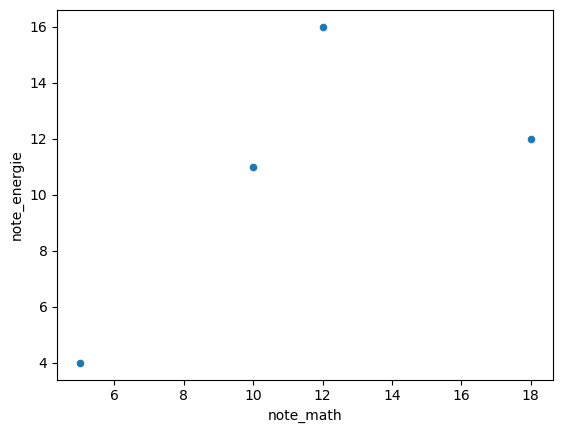

In [45]:
df.plot(kind='scatter', x='note_math',y='note_energie') 

Plot: histogramme

<Axes: ylabel='Frequency'>

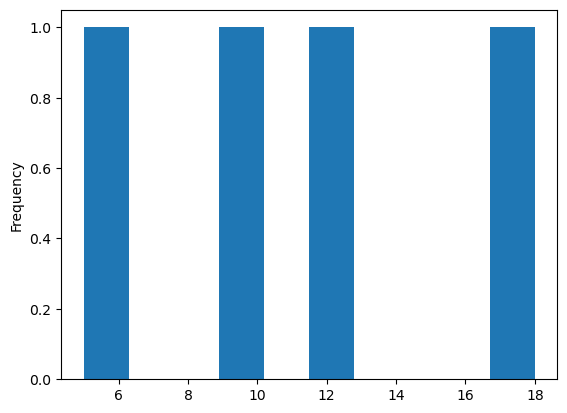

In [52]:
#df.plot?
df['note_math'].plot.hist()

Exercice 0
---------------

In [ ]:
np.random.seed(42)
random.seed(42)
n = 1000
df = pd.DataFrame({'prenom':[randomWord() for i in range(n)],'note_math': 2*np.random.randn(n)+12, 'note_energie':4*np.random.randn(n)+8,
                   'BUT': np.random.choice([1,2],n)})
df.note_energie = df.note_energie.apply(lambda x: max(x,0))
df.note_math = df.note_math.apply(lambda x: max(x,0))
df.head() # ATTENTION, la fonction head() montre uniquement les première lignes du tableau

prenom  note_math  note_energie  BUT
0  zabik  12.993428     13.597422    2
1  kefud  11.723471     11.698535    1
2  xocad  13.295377      8.238521    2
3  jevub  15.046060      5.412253    1
4  wezur  11.531693     10.792893    1

Répondre aux questions ci-dessous en utilisant des fonctions pandas.

1. Quelle est la meilleure note en maths en BUT1?
1. Qui a la meilleure moyenne sur les matières maths et énergie (attention: i lfaut calculer la moyenne de chaque étudiant) ? Combien vaut cette moyenne ?
1. Quelle est la meilleure note de BUT1 ? BUT2 ?
1. Trouver $x$ tel que $75\%$ des notes de maths de BUT1 sont inférieures à $x$. On note cette valeur $x_{0.75}$.
1. Trouver $x$ tel que $25\%$ des notes de maths de BUT1 sont inférieures à $x$. On note cette valeur $x_{0.25}$.
1. En déduire l'écart interquartile (EIQ) des notes de maths de BUT1 (rappel: EIQ est défini comme $x_{0.75}-x_{0.25}$).
1. Recommencer pour les notes de BUT2
1. Comparer les EIQ des notes de BUT1 et BUT2


Exercice 1.1
-----------

A partir des données de l'exercice TD 1.1 (colonnes de droite), répondre aux questions à l'aide de Python/Pandas:

1. Compter les effectifs de chaque groupe et calculer les fréquences.


Exercice 1.2
-----------

A partir des données de l'exercice TD 1.2 (2°), répondre aux questions à l'aide de Python/Pandas:

1. Calculer les fréquences. 
1. Tracer l'histogramme en prenant des intervalles $[i, i+1[$ puis $[i, i+2[$.
1. On ajoutera la ligne  $f_i . x_i$. En déduire la moyenne.
1. Calculer la statistique d'ordre. En déduire la médiane.


Exercice 2.1
--------------

A partir des données de l'exercice TD 2.1 (colonnes de droite), répondre aux questions à l'aide de Python/Pandas:

1. Créer une colonne $f_i.(x_i-\bar{x})^2$, en déduire la variance et l’écart-type. 


Exercice 2.2
---------------

A partir des données du TD 2.2 (2°), répondre aux questions traitées en TD à l'aide de Python/Pandas:

1. Créer une colonne $f_i.(x_i-\bar{x})^2$, en déduire la variance et l’écart-type. 


Exercice 2.3
-----------------


Pour les données de l’exercice TD 1.4:

1. Créer une colonne $f_i.(x_i-\bar{x})^2$, en déduire la variance et l’écart-type. 


Exercice 2.4
----------------

1. Pour les données de l'exercice TD 1.1, centrer et réduire les données.
1. Que valent la moyenne et l'écart-type des données transformées

Exercice 2.5
----------------

1. Pour les données de l'exercice TD 1.4, centrer et réduire les données.
1. Que valent la moyenne et l'écart-type des données transformées

Aide-mémoire python/numpy/pandas
------------------------------

* doc [numpy](https://docs.scipy.org/doc/numpy/)
* doc [scipy](https://docs.scipy.org/doc/scipy/)


| Pandas  | Explication | Exemple |
|----|----|----|
|`df['col'].sum()`|calcul de la somme des valeurs de la colonne|`df['x'].min()`|
|`df['col'].min()`|calcul du min de la colonne|`df['x'].min()`|
|`df['col'].max()`|calcul du max de la colonne|`df['x'].max()`|




| Numpy | Explication | Exemple |
|----|----|----|
|`np.array(x)`|initialisation d'un vecteur numpy|`x=np.array([1,2,3])`|
|  `np.pi` | Constante de valeur $\pi$ | Affiche la valeur de $\cos(\pi)$: `np.cos(np.pi)`| 
|`np.ones(n)`|vecteur composé de 1 |`x=np.ones(10)`|
|`np.ones((m,n))`|matrice composée de 1 |`x=np.ones((10,20))`|
|`np.zeros(n)`|vecteur composé de 0 |`y=np.zeros(20)`|
|`np.zeros((m,n))`|matrice composée de 0 |`y=np.zeros((10,20))`|
| `np.arange(n)`| Calcule le vecteur `[0,1,...,n-1]` | `np.arange(10)` |
|  `np.linspace(a,b,n)` | Calcule $n$ points répartis sur un intervalle $[a,b]$ | `t=np.linspace(0,1,10)`|   
| `np.sin,np.cos,np.exp` | Fonctions vectorisées de base | `A = np.sin(np.pi/2.) +np.exp(-1)` | 
|   | | `x=np.linspace(0,2*np.pi,50); y=np.sin(x)` | 
| carré | `**2`| `x=2; y=x**2` | 
|  | | `x=np.linspace(0,1,50); y=x**2` | 
|  `np.sqrt(x)` | Racine carrée | `np.sqrt(4)`| 
|  `plt.plot(t,x)` | Trace une ligne composée de points $(x_0,y_0), (x_1,y_1), \ldots$| `t = np.linspace (0,1,10); plt.plot(t,t**2)`|  
|`np.sum(x)`| somme des éléments de `x`| `np.sum([1,1,1])`|
|`np.abs(x)`| valeur absolue (ou module pour les complexes )| `np.abs(-1); np.abs(1+1j)`|
|`x.shape`| taille d'un tableau crée avec numpy| `x=np.zeros(10); print(x.shape[0])`| 
|`x.dtype`|type des éléments tableau numpy| `x=np.linspace(0,1,10); x.dtype`|

In [ ]:
Refs:

* https://pythonds.linogaliana.fr/content/manipulation/02_pandas_intro.html
* https://github.com/stefmolin/pandas-workshop
